项目结构

```
├───images
│       baggage_claim.jpg
│       dining_table.jpg
│       living_room.jpg
│       soccer.jpg
├───videos
│       airport.mp4
│       car_chase_01.mp4
│       car_chase_02.mp4
│       overpass.mp4
└───yolo-coco
        coco.names
        yolov3.cfg
        yolov3.weights
```

# 导入库

In [1]:
# import the necessary packages
import numpy as np
import argparse
import time
import cv2
import os

# 配置Yolo参数

In [2]:
BASE_DIR = os.path.dirname(os.path.abspath('__file__')) # base path to YOLO directory
image_path = os.path.join(BASE_DIR, "images", "living_room.jpg") # path to input image

confidence_input = 0.5 # minimum probability to filter weak detections
threshold_input = 0.3 # threshold when applying non-maxima suppression

加载所有类 <font color='red'>LABELS</font>，其类型是列表，保存的是类别名称，然后将随机颜色分配给每个标签

In [3]:
# load the COCO class labels our YOLO model was trained on
labelsPath = os.path.sep.join([BASE_DIR, "yolo-coco", "coco.names"])
LABELS = open(labelsPath).read().strip().split("\n")

# initialize a list of colors to represent each possible class label
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(len(LABELS), 3), dtype="uint8")

In [4]:
print(LABELS)
#print(COLORS)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


下面设置YOLO<font color='red'>权重</font>和<font color='red'>配置</font>文件的路径，然后从磁盘加载YOLO文件：

In [5]:
# derive the paths to the YOLO weights and model configuration
weightsPath = os.path.sep.join([BASE_DIR, "yolo-coco","yolov3.weights"])
configPath = os.path.sep.join([BASE_DIR, "yolo-coco", "yolov3.cfg"])

# load our YOLO object detector trained on COCO dataset (80 classes)
print("[INFO] loading YOLO from disk...")
net = cv2.dnn.readNetFromDarknet(configPath, weightsPath)

[INFO] loading YOLO from disk...


从磁盘加载YOLO文件后，利用OpenCV中的 <font color="red">cv2.dnn.readNetFromDarknet</font> 函数从中读取网络文件及权重参数，此函数需要两个参数 ```configPath``` 和 ```weightsPath``` ,使用<font color="red">Darknet</font>

> OpenCV 的版本至少是3.4.2及以上才能运行此代码，因为它需要加载YOLO所需的更新的 dnn 模块。



# 图像加载并处理

下面加载图像并处理：

In [6]:
# load our input image and grab its spatial dimensions
image = cv2.imread(image_path)
(H, W) = image.shape[:2]
print("image.shape:", image.shape)

# determine only the *output* layer names that we need from YOLO
ln = net.getLayerNames()
print(len(ln),ln)
print(net.getUnconnectedOutLayers())
try:
    ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()]
except:
    ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]

# construct a blob from the input image and then perform a forward
# pass of the YOLO object detector, giving us our bounding boxes and
# associated probabilities
blob = cv2.dnn.blobFromImage(image, 1 / 255.0, (416, 416), swapRB=True, crop=False)
net.setInput(blob)
start = time.time()
layerOutputs = net.forward(ln)
end = time.time()
# show timing information on YOLO
print("[INFO] YOLO took {:.6f} seconds".format(end - start))

image.shape: (530, 600, 3)
254 ['conv_0', 'bn_0', 'relu_0', 'conv_1', 'bn_1', 'relu_1', 'conv_2', 'bn_2', 'relu_2', 'conv_3', 'bn_3', 'relu_3', 'shortcut_4', 'conv_5', 'bn_5', 'relu_5', 'conv_6', 'bn_6', 'relu_6', 'conv_7', 'bn_7', 'relu_7', 'shortcut_8', 'conv_9', 'bn_9', 'relu_9', 'conv_10', 'bn_10', 'relu_10', 'shortcut_11', 'conv_12', 'bn_12', 'relu_12', 'conv_13', 'bn_13', 'relu_13', 'conv_14', 'bn_14', 'relu_14', 'shortcut_15', 'conv_16', 'bn_16', 'relu_16', 'conv_17', 'bn_17', 'relu_17', 'shortcut_18', 'conv_19', 'bn_19', 'relu_19', 'conv_20', 'bn_20', 'relu_20', 'shortcut_21', 'conv_22', 'bn_22', 'relu_22', 'conv_23', 'bn_23', 'relu_23', 'shortcut_24', 'conv_25', 'bn_25', 'relu_25', 'conv_26', 'bn_26', 'relu_26', 'shortcut_27', 'conv_28', 'bn_28', 'relu_28', 'conv_29', 'bn_29', 'relu_29', 'shortcut_30', 'conv_31', 'bn_31', 'relu_31', 'conv_32', 'bn_32', 'relu_32', 'shortcut_33', 'conv_34', 'bn_34', 'relu_34', 'conv_35', 'bn_35', 'relu_35', 'shortcut_36', 'conv_37', 'bn_37', 're

---
**```net.getUnconnectedOutLayers()```的返回值在不同版本有差别**

```
opencv-python        4.5.5.62

ln = [ln[i - 1] for i in net.getUnconnectedOutLayers()]
ln = [ln[i[0] - 1] for i in net.getUnconnectedOutLayers()] # getUnconnectedOutLayers返回数组，每个元素都是数字
IndexError: invalid index to scalar variable.

opencv-python        3.4.8.29
```
---

在该代码中：
- 加载输入 图像并获得其尺寸；
- 确定YOLO模型中的输出图层名称；
- 从图像构造一个 blob结构；

当blob准备好了后，我们就会
- 通过YOLO网络进行前向传递；
- 显示YOLO的推理时间；  

# 记录检测结果和过滤对象

现在采取措施来过滤和可视化最终的结果。首先，让我们初步化一些处理过程中需要的列表：

In [7]:
# initialize our lists of detected bounding boxes, confidences, and
# class IDs, respectively
boxes = []
confidences = []
classIDs = []

这些列表包括：
- ```boxes``` ：对象的边界框。
- ```confidences``` ：YOLO分配给对象的置信度值，较低的置信度值表示该对象可能不是网络认为的对象。上面的命令行参数中将过滤掉不大于 0.5阈值的对象。
- ```classIDs``` ：检测到的对象的类标签。

下面用YOLOlayerOutputs中的数据填充这些列表 ：

In [8]:
# loop over each of the layer outputs
for output in layerOutputs:
    # loop over each of the detections
    for detection in output:
        # extract the class ID and confidence (i.e., probability) of
        # the current object detection
        scores = detection[5:]
        classID = np.argmax(scores)
        confidence = scores[classID]
        # filter out weak predictions by ensuring the detected
        # probability is greater than the minimum probability
        if confidence > confidence_input:
            # scale the bounding box coordinates back relative to the
            # size of the image, keeping in mind that YOLO actually
            # returns the center (x, y)-coordinates of the bounding
            # box followed by the boxes' width and height
            box = detection[0:4] * np.array([W, H, W, H])
            (centerX, centerY, width, height) = box.astype("int")
            # use the center (x, y)-coordinates to derive the top and
            # and left corner of the bounding box
            x = int(centerX - (width / 2))
            y = int(centerY - (height / 2))
            # update our list of bounding box coordinates, confidences,
            # and class IDs
            boxes.append([x, y, int(width), int(height)])
            confidences.append(float(confidence))
            classIDs.append(classID)

在这个块中：
- 循环遍历每个 layerOutputs ；
- 循环每个 detection 中 output ；
- 提取 classID 和 confidence ；
- 使用 confidence 滤除弱检测；

过滤掉了不需要的检测结果后，我们将：
- 缩放边界框坐标，以便我们可以在原始图像上正确显示它们；
- 提取边界框的坐标和尺寸，YOLO返回边界框坐标形式： （centerX ，centerY ，width，height）；
- 使用此信息导出边界框的左上角（x，y）坐标；
- 更新 boxes ， confidences ， classIDs 列表。

有了这些数据后，将应用<font color='red'>“非最大值抑制”（non-maxima suppression，nms）</font>：

# 非最大值抑制（non-maxima suppression)

In [9]:
# apply non-maxima suppression to suppress weak, overlapping bounding
# boxes
idxs = cv2.dnn.NMSBoxes(boxes, confidences, confidence_input, threshold_input)

YOLO算法并没有应用非最大值抑制，这里需要说明一下。应用非最大值抑制可以抑制明显重叠的边界框，只保留最自信的边界框，NMS还确保我们没有任何冗余或无关的边界框。

利用OpenCV内置的NMS DNN模块实现即可实现非最大值抑制 ，所需要的参数是边界 框、 置信度、以及置信度阈值和NMS阈值。

# 绘制检测框和类文本

最后在图像上绘制检测框和类文本：

(5, 1)


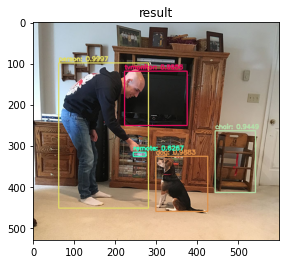

In [10]:
import matplotlib.pyplot as plt

print(idxs.shape)
# ensure at least one detection exists
if len(idxs) > 0:
    # loop over the indexes we are keeping
    for i in idxs.flatten():
        # extract the bounding box coordinates
        (x, y) = (boxes[i][0], boxes[i][1])
        (w, h) = (boxes[i][2], boxes[i][3])
        # draw a bounding box rectangle and label on the image
        color = [int(c) for c in COLORS[classIDs[i]]]
        cv2.rectangle(image, (x, y), (x + w, y + h), color, 2)
        text = "{}: {:.4f}".format(LABELS[classIDs[i]], confidences[i])
        cv2.putText(image, text, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX,0.5, color, 2)

# show the output image
#cv2.imshow("Image", image)
#cv2.waitKey(0) # 'q'

#cv2.destroyAllWindows()

# 注意opencv加载的是BGR格式， 而matplotlib显示的是RGB格式
#plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB), cmap='gray')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('result')

plt.show()

假设存在至少一个检测结果，就循环用非最大值抑制确定idx 。然后，我们使用随机类颜色在图像上绘制边界框和文本 。最后，显示结果图像，直到用户按下键盘上的任意键。

# 参考文档 
- https://bbs.cvmart.net/articles/107/yi-wen-dai-ni-xue-hui-shi-yong-yolo-ji-opencv-wan-cheng-tu-xiang-mu-biao-jian-ce-fu-yuan-ma
- https://pyimagesearch.com/2018/11/12/yolo-object-detection-with-opencv/
- https://opencv-tutorial.readthedocs.io/en/latest/yolo/yolo.html


In [ ]:
!pip list